# Analyse des donnees

## Les imports

In [130]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import ast            # Pour convertir les chaines de carateres en type Python
import warnings       # Pour eviter de souvent afficher des messages d'erreurs encombrants

## Chargeons les donnees

### Version Colab

In [131]:
# "to load data from github (update it if we have to)"
# import os
# if not os.path.exists("assets"):
#     print("Data wansn't here. Let's download it!")
#     !git clone https://github.com/desmond-rn/assets.git
# else:
#     print("Data already here. Let's update it!")
#     %cd assets
#     # %rm -rf assets
#     !git pull https://github.com/desmond-rn/assets.git
#     %cd ..

# print("\n")
# !ls assets/dataframes/inverse

# df_spatial_path = "assets/dataframes/inverse/df_spatial.csv"
# df_temporal_path = "assets/dataframes/inverse/df_temporal.csv"

### Version Jupyter

In [132]:
"to load data locally"

%ls "../../data"

df_spatial_path = "../../data/df_spatial.csv"
df_temporal_path = "../../data/df_temporal.csv"

Volume in drive C has no label.
 Volume Serial Number is 2248-85E1

 Directory of c:\Users\Roussel\Dropbox\Unistra\SEMESTRE 2\Projet\Inverse\moco-inverse\data

16/05/2020  19:10    <DIR>          .
16/05/2020  19:10    <DIR>          ..
17/05/2020  10:11            61,341 dataframe_1.csv
17/05/2020  10:11            87,844 dataframe_2.csv
16/05/2020  15:20             1,394 df_1.csv
18/05/2020  01:42             4,828 df_1_test.csv
16/05/2020  15:20             1,484 df_2.csv
18/05/2020  01:42            16,550 df_2_test.csv
18/05/2020  01:47           158,290 df_spatial.csv
18/05/2020  01:47            87,456 df_temporal.csv
               8 File(s)        419,187 bytes
               2 Dir(s)  101,021,319,168 bytes free


**Obectif du projet**
- Analyse des donnees

## I - RETRAITEMENT DES DONNESS

## En espace

In [133]:
types = {'x_min':float, 'x_max':float, 'N':int, 'c':float, 'a':float, 'C_v':float, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_init_expr':str, 'F_init_expr':str, 'T_init_expr':str, 'dt':float, 'step_count':int, 'x':str, 'rho':str, 'sigma_a':str, 'sigma_c':str, 'E_init':str, 'E_final':str, 'F_init':str, 'F_final':str, 'T_init':str, 'T_final':str}

df_space = pd.read_csv(df_spatial_path, thousands=',', dtype=types)

# df_space.head(15)
df_space.loc[:, ['x','rho_expr', 'sigma_a_expr', 'sigma_c_expr']].head(30)

,x,rho_expr,sigma_a_expr,sigma_c_expr
0,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",0,1,0
1,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",0,1,5
2,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",0,5,0
3,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",0,5,5
4,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",1,1,0
5,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",1,1,5
6,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",1,5,0
7,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",1,5,5
8,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",2,1,0
9,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...",2,1,5


In [134]:
df_space.dtypes

x_min           float64
x_max           float64
N                 int32
c               float64
a               float64
C_v             float64
CFL             float64
epsilon         float64
t_final         float64
rho_expr         object
sigma_a_expr     object
sigma_c_expr     object
E_init_expr      object
F_init_expr      object
T_init_expr      object
dt              float64
time_steps        int64
x                object
rho              object
sigma_a          object
sigma_c          object
E_init           object
E_final          object
F_init           object
F_final          object
T_init           object
T_final          object
dtype: object

In [135]:
type(df_space.loc[0, 'rho_expr'])

str

## En temps

In [136]:
types = {'x_min':float, 'x_max':float, 'N':int, 'c':float, 'a':float, 'C_v':float, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':str, 'sigma_a_expr':str, 'sigma_c_expr':str, 'E_init_expr':str, 'F_init_expr':str, 'T_init_expr':str, 'dt':float, 'step_count':int, 'E_left':str, 'E_right':str, 'F_left':str, 'F_right':str, 'T_left':str, 'T_right':str}
df_time = pd.read_csv(df_temporal_path, thousands=',', dtype=types)

df_time.head(1)

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,...,T_init_expr,dt,step_count,t,E_left,E_right,F_left,F_right,T_left,T_right
0,0.0,1.0,100,1.0,1.0,1.0,0.99,0.000001,0.5,0,...,1,0.0099,51,"[0, 0.0099, 0.0198, 0.0297, 0.0396, 0.0495, 0....","[5.21674e-22, 2.09669e-21, 1.2677e-20, 8.09504...","[5.21674e-22, 2.09669e-21, 1.2677e-20, 8.09504...","[0, -1.57502e-21, -1.21553e-20, -8.04287e-20, ...","[0, 1.57502e-21, 1.21553e-20, 8.04287e-20, 5.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


# II - VISUALISATION DES DONNES

## En espace

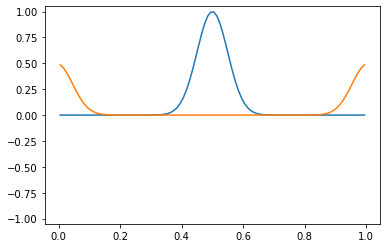

In [137]:
""" plot pour la premiere ligne"""
# x_expr = df_space.loc[2, 'rho_exp']
# x_expr

index = 0

x = df_space.loc[index, 'x']
type(x)
x = np.array(ast.literal_eval(x))
# print(x)

y1 = df_space.loc[index, 'E_init']
y2 = df_space.loc[index, 'E_final']
# y = df_space.loc[index, 'sigma_c']
# y = df_space.loc[index, 'T_init']
# y = df_space.loc[index, 'T_final']
# y = df_space.loc[index, 'rho']
type(x)
y1 = np.array(ast.literal_eval(y1))
y2 = np.array(ast.literal_eval(y2))
# print(y)

ax = plt.gca()
ax.set_ylim([-1.05, 1.05])
ax.plot(x, y1)
ax.plot(x, y2)


# En temps

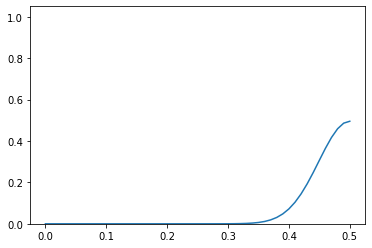

In [138]:
index = 0

time_steps = df_time.loc[index, 'step_count']
t_final = df_time.loc[index, 't_final']
dt = df_time.loc[index, 'dt']

t = np.linspace(0, t_final, time_steps)

y = df_time.loc[index, 'E_right']
y = np.array(ast.literal_eval(y))

ax = plt.gca()
ax.set_ylim([0, 1.05])
ax.plot(t, y)

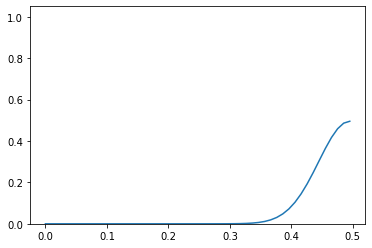

In [139]:
index = 0

t = df_time.loc[index, 't']
t = np.array(ast.literal_eval(t))

y = df_time.loc[index, 'E_right']
y = np.array(ast.literal_eval(y))

ax = plt.gca()
ax.set_ylim([0, 1.05])
ax.plot(t, y)